# Tutorial 12 - Line Graphs with `pandas`

In this tutorial we begin our discussion of data visualization in Python.  As a first exercise in visualization, we graph various volatility-related time series which demonstrate certain features of stock market returns.  In order to do this we utilize some of `pandas` built-in visualization tools.  These visualization tools are built on top of the `matplotlib` package.

Unlike R, in which a single package (`ggplot2`) has become the de facto standard for visualization, in Python there are a variety of packages that form a visualization ecosystem.  The `matplotlib` package is the foundation of much of the modern plotting ecosystem, and many elements of this ecosystem can be thought of as a wrapper around `matplotlib`.  Such packages include `seaborn` (which we will discuss later) and also the visualization tools in `pandas` which we discuss here.

The API for `matplotlib` is fairly low level, which means you have to specify a lot of different things for each graph.  In practice this can be cumbersome for quick plotting.  Many of parts of the visualization ecosystem seek to simplify the creation of *standard* graphs, and this is true of the `pandas` visualization functionality.

### Load Packages

Let's begin by loading the packages that we will need.

In [1]:
import numpy as np
import pandas as pd

### `IPython` Magic Commands

Now that we are (implictly) using `matplotlib`, we will have occasion to use our first `IPython` magic command, which are often referred to as simply *magics*.

The following line of code tells Jupyter to print graphs as output just below the code cell - in the same way that other ouput is printed to the screen.

In [2]:
%matplotlib inline

Magics are convenience functions that `IPython` adds to base `Python` to make a variety of analysis tasks easier.  

Another example is `%timeit` that performs time tests on code.

In [3]:
%timeit L = [n ** 2 for n in range(1000)]

567 µs ± 6.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


You can read more about magics in Section 1.3 of *PDSH*.  The primary magic command that we will utilize in this class is `%matplotlib inline`.

### Reading In Data

Let's read in the data that we will use in this tutorial, which is in following file: `spy_2014_2018.csv`.  

These are `SPY` prices from Yahoo from 2014-2018. 

In [4]:
df_spy = pd.read_csv('../data/spy_2014_2018.csv')
df_spy.head()

,date,open,high,low,close,volume,adjusted
0,2014-01-02,183.979996,184.070007,182.479996,182.919998,119636900,165.662872
1,2014-01-03,183.229996,183.600006,182.630005,182.889999,81390600,165.635696
2,2014-01-06,183.490005,183.559998,182.080002,182.360001,108028200,165.155701
3,2014-01-07,183.089996,183.789993,182.949997,183.479996,86144200,166.170044
4,2014-01-08,183.449997,183.830002,182.889999,183.520004,96582300,166.206268


**Code Challenge:** There is an issue with the data in the `date` column.  How can you identify and fix it?

In [5]:
# keep this in the filled version so the rest of the notebook will run
df_spy['date'] = pd.to_datetime(df_spy['date'])



### Creating a Basic Price Plot

Pandas was created by Wes McKinney when he was a quantitative analyst at the hedge fund called AQR.  One of McKinney's goals for `pandas` was to facilitate the analysis of financial time series.  

So, for example, plotting stock prices and returns over time can be done very easily.

The following single line of code produces a line graph consisting of the adjusted prices of SPY over time.

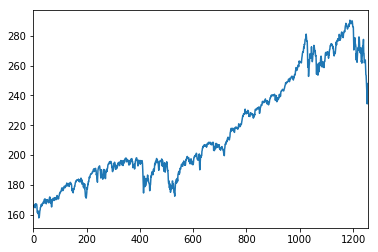

In [6]:
df_spy['adjusted'].plot();

Note that `.plot()` is a `DataFrame` method.

Now, for the purposes of exploratory data analysis (EDA), this plot may be all that you need.  However, if we needed to share this graph in a publication or presentation, there are a variety of shortcomings that we would need address by utilizing various arguments of the `.plot()` method.

### Improving Our Graph

First, notice that the x-axis consists of numbers, rather than the trade-dates.  The reason for this is that by default, `pandas` plotting uses the `index` of the `DataFrame` to label the x-axis.

In order for the x-axis labeling to work properly we need to set the `date` column as the `index`.

In [7]:
df_spy.set_index(['date'], inplace=True)

Now, if we graph our plot we will see the dates along the x-axis.

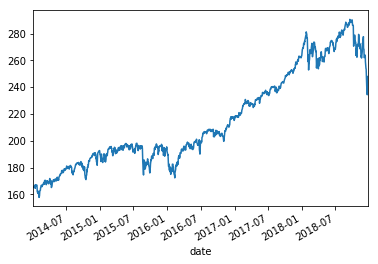

In [8]:
df_spy['adjusted'].plot();

Next, let's add a title to our graph, and add some grid lines to make it a little easier to read.

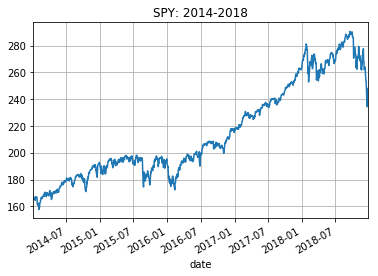

In [9]:
df_spy['adjusted'].\
    plot(
        title = 'SPY: 2014-2018'
        , grid = True
    );

In order to add custom labels to the x-axis and y-axis we will have to work with the `matplotlib` API.  Don't worry about the details too much right now, just copy this code if you need to relabel your axes.

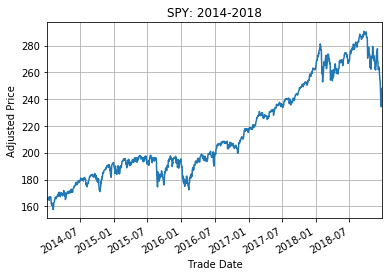

In [10]:
ax = df_spy['adjusted'].\
        plot(
            title = 'SPY: 2014-2018'
            , grid = True
        );
ax.set_xlabel('Trade Date');
ax.set_ylabel('Adjusted Price');

**Coding Challenge:** Copy the code above and then see what the effect is of adding these arguments to `.plot()`:

    1. figsize = (10, 5)
    2. style = 'b--'
    3. alpha = 0.5

For the remainder of the tutorial we will utilize graphs as we would for EDA, so we won't concern ourselves with title and labels.  

However, whenever graphs are being used to communicate results with a broader audience, they should be properly labeled.

### Subplot of Price and Returns

In this section, we will plot prices and returns as subplots on the same x-axis.  This dual plot will demonstrate the *leverage effect*: when the stock market suffers losses, there is greater volatility.

Let's begin by adding a `returns` column to `df_spy`.

In [11]:
df_spy['return'] = \
    np.log(df_spy['adjusted']) - np.log(df_spy['adjusted'].shift(1))

Now we can use the `subplots` argument of `.plot()` to plot both the prices and returns simulatneously.

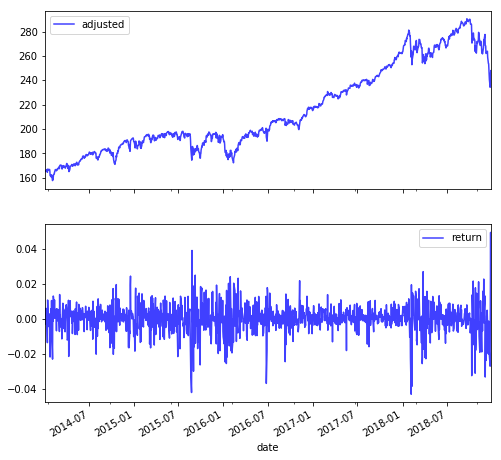

In [12]:
df_spy[['adjusted', 'return']].plot(subplots=True, style='b', alpha=0.75, figsize=(8, 8));

It is easy to confirm visually that when the market goes down, the magnitude of the proximate returns is large, i.e. there is greater volatility.  Similarly, during bull markets, returns tend to be smaller in magnitude.

### Realized Volatility

Plotting the realized volatility - i.e. the rolling standard deviation - also demonstrates the leverage effect.

Rolling calculations are very typical in time series analysis, and so it's not surprising that the can be executed easily in `pandas`.  In particular, we will use the `DataFrame.rolling()` method.

In [13]:
pd.options.display.max_rows = 6
df_spy['return'].rolling(42).std() * np.sqrt(252)

date
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
                ...   
2018-12-26    0.252143
2018-12-27    0.248541
2018-12-28    0.245335
Name: return, Length: 1257, dtype: float64

Note that the argument of `.rolling()` is the window size, which we set to two months. 

Let's add this rolling realized volatility calculation to `df_spy`.

In [14]:
df_spy['realized_vol'] = \
    df_spy['return'].rolling(42).std() * np.sqrt(252)

And again, we can use the `subplot` argument of `.plot()` to plot all three time series.

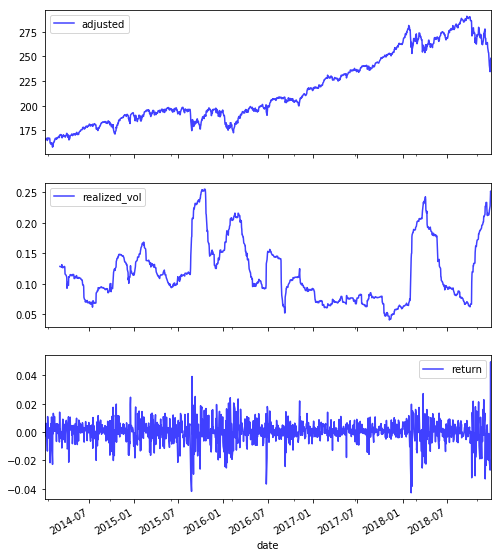

In [15]:
df_spy[['adjusted', 'realized_vol', 'return']].\
    plot(subplots=True, style='b', alpha=0.75, figsize=(8, 10));

Notice that when there is a market downturn, there is a spike in the realized volatility graph.

### Implied Volatility - The VIX Index

During times of market stress, options all become more expensive.  One measure of the relative cheapness or expensiveness of options is *implied volatility*.  When options become more expensive, implied volatility rises.

One of the complexities of implied volatility measurements is that even for a single underlying they differ depending on strike and expiration.  However, all implied volatility measurements tend to rise and fall together.

The VIX index is a single number that summarizes the general level of option implied volatility for options on the S&P500.  The S&P500 represents a large number of the most important stocks in America.  Moreover, S&P500 options are the most actively traded options in the world.  For these reasons, the VIX is a good barometer for overall implied volatility level in the stock market. 

Let's take a look at daily VIX levels from 2014 to 2018, which can be found in `vix_2014_2018.csv`.

In [16]:
df_vix_all = pd.read_csv('../data/vix_2014_2018.csv')
df_vix_all.head()

,date,open,high,low,close,volume,adjusted
0,2014-01-02,14.32,14.59,14.00,14.23,0,14.23
1,2014-01-03,14.06,14.22,13.57,13.76,0,13.76
2,2014-01-06,13.41,14.00,13.22,13.55,0,13.55
3,2014-01-07,12.38,13.28,12.16,12.92,0,12.92
4,2014-01-08,13.04,13.24,12.86,12.87,0,12.87


We are only interested in the `close` price, so let's isolate it into it's own `DataFrame`.

In [17]:
df_vix = df_vix_all[['date', 'close']].copy()

Notice that we have to use the `.copy()` method, or else `df_vix` would be a *reference* to a sub-`DataFrame` of `df_vix_all`.

**Code Challenge:** Create a `DataFrame` called: `df_test = df_vix_all[['date', 'close']]`. Now, try to change the `dtype` of the `date` column to a `datetime` and see what happens.

Next, let's do the following: 

1. change date type of `date` column; 
1. set the `date` column to the index; 
1. reame the `close` column to `vix`.

In [18]:
df_vix['date'] = pd.to_datetime(df_vix['date']) # changing date column to datetime
df_vix.set_index(['date'], inplace=True) # setting date column to index
df_vix.rename({'close':'vix'}, axis='columns', inplace=True) # renaming 'close' to 'vix'

Let's get the `vix` column into `df_spy` by joining our two tables together with `pd.merge()`.

In [19]:
df_spy = pd.merge(df_spy, df_vix, on=['date'])

Finally, let's plot all our volatility measures in the same graph.

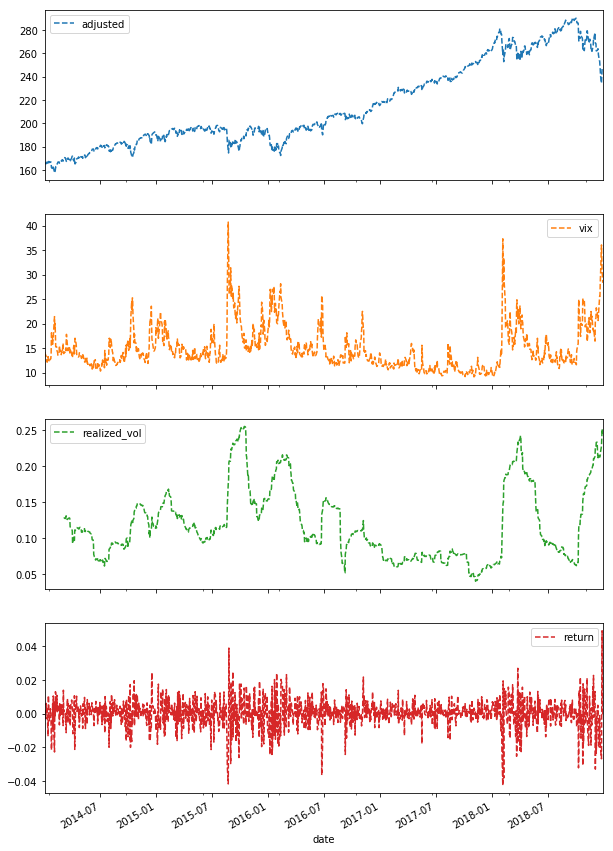

In [20]:
df_spy[['adjusted', 'vix', 'realized_vol', 'return']].\
    plot(subplots=True, style='--', figsize=(10, 16));

This plot demonstrates typical behavior of stock market returns and volatility:

When there is a market downturn, there is a spike in both implied volatility and realized volatility.

## Further Reading

*PDSH* - 1.3 - Python Magic Commands

*P4F* - 6.2 - Financial Data

*P4DA* - 8.1 - A Brief `matplotlib` API Primer

*P4DA* - 8.2 - Plotting Functions in `pandas`